# FFNN

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense

In [3]:
def read_table(path):
    """Reads table and drops irrelevant rows and columns.
    Returns an analysis ready DataFrame"""
    df = pd.read_table('EMG/'+path)
    df = df[df['class']!=0]
    df = df[df['class'] != 7]
    df.drop(columns=['time'], inplace=True)

    # Map the classes so they range from 0-6 for cross entropy loss to work
    mapping = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6} # get rid of 7 later
    df['class'] = df['class'].map(mapping)

    df.reset_index(drop=True,inplace=True)
    return df


def scaler(df):
    """Normalizes the data, returns a DataFrame with the new scaled numbers"""
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(scaled, columns=df.columns)
    return df_scaled

In [4]:
df = pd.concat([read_table('1/1_1.txt'), read_table('1/2_1.txt')])
for n in range(2,37):
    path1 = f'{n}/1_{n}.txt'
    df = pd.concat([df, read_table(path1)])
    path2 = f'{n}/2_{n}.txt'
    df = pd.concat([df, read_table(path2)])

# We found one row with NaN as a class value so we just dropped it.
df = df.dropna()

df.reset_index(drop=True,inplace=True)

In [334]:
df['class'].value_counts()

class
5.0    253009
4.0    251733
3.0    251570
0.0    250055
2.0    249494
1.0    243193
6.0     13696
Name: count, dtype: int64

In [298]:
x = df.drop(columns='class')
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20)
X_train = scaler(X_train)
X_test = scaler(X_test)

In [311]:
X_train

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,1.142842,1.024036,0.288102,-0.002146,-0.129742,0.686878,0.055878,0.201497
1,0.094745,-0.881516,-1.893477,-1.442477,-0.350584,-0.873191,-0.341717,0.002956
2,0.042340,-0.002030,-0.584530,-0.077953,0.028001,-0.073156,0.112678,0.151862
3,-1.110566,0.217841,0.360821,0.035757,-0.508328,-0.433172,-0.114520,-0.344489
4,-0.114874,0.144550,0.433540,-0.077953,-0.066645,-0.073156,0.339875,-0.046679
...,...,...,...,...,...,...,...,...
1210195,-0.010064,0.144550,0.360821,-0.115857,-0.098194,0.006848,-0.000921,0.002956
1210196,-0.114874,-0.295192,0.142663,-0.229567,-0.539876,-1.673226,-0.284918,-0.145949
1210197,-0.272089,-0.441773,0.215382,1.210764,2.993585,0.566872,0.226276,0.102227
1210198,-0.114874,-0.148611,-0.148214,-0.077953,-0.003547,0.006848,-0.000921,-0.096314


In [302]:
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                90        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 7)                 77        
                                                                 
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [303]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=30)

Epoch 1/20
40340/40340 [==============================] - 29s 699us/step - loss: 1.1024 - accuracy: 0.5808
Epoch 2/20
40340/40340 [==============================] - 25s 626us/step - loss: 1.0244 - accuracy: 0.6125
Epoch 3/20
40340/40340 [==============================] - 44s 1ms/step - loss: 0.9919 - accuracy: 0.6241
Epoch 4/20
40340/40340 [==============================] - 43s 1ms/step - loss: 0.9815 - accuracy: 0.6266
Epoch 5/20
40340/40340 [==============================] - 28s 682us/step - loss: 0.9777 - accuracy: 0.6279
Epoch 6/20
40340/40340 [==============================] - 26s 639us/step - loss: 0.9742 - accuracy: 0.6293
Epoch 7/20
40340/40340 [==============================] - 34s 831us/step - loss: 0.9732 - accuracy: 0.6297
Epoch 8/20
40340/40340 [==============================] - 26s 638us/step - loss: 0.9724 - accuracy: 0.6296
Epoch 9/20
40340/40340 [==============================] - 23s 572us/step - loss: 0.9714 - accuracy: 0.6303
Epoch 10/20
40340/40340 [================

In [309]:
y_train.value_counts()

class
5.0    202511
3.0    201479
4.0    201130
0.0    200251
2.0    199295
1.0    194591
6.0     10943
Name: count, dtype: int64

9455/9455 [==============================] - 6s 653us/step


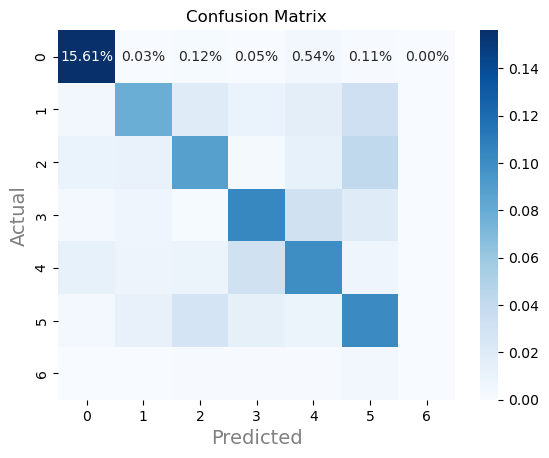

In [310]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)


cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%', xticklabels=[f'0', '1', '2', '3', '4', '5','6'], 
            yticklabels=[f'0', '1', '2', '3', '4', '5','6'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=14, color='grey')
plt.ylabel('Actual', fontsize=14, color='grey')
plt.show()

In [252]:
model.evaluate(X_test,y_test)

9370/9370 [==============================] - 4s 445us/step - loss: 0.9372 - accuracy: 0.6345


[0.9372495412826538, 0.6345264315605164]

# LSTM

In [74]:
# There are two sets of readings for each gesture in each dataset. 
# Here we are collecting the readings over a 1 second window for evaluation.
def collect_readings(df):
    """
    Collects the readings for each gesture in given df over a 1 second window.
    Returns two arrays, one containing the readings of shape (12, 1000, 8)
    and another of shape (12,) containing the respective gesture class.
    """
    readings = np.zeros((12,1000,8))
    gestures = np.zeros((12))
    index = 0
    for i in range(6):
        first = df[df['class']==i].iloc[:1000]
        second = df[df['class']==i].iloc[-1000:]
        readings1 = first.drop(columns='class').values
        readings2 = second.drop(columns='class').values
        readings[index] = readings1
        readings[index+1] = readings2
        gestures[index] = i
        gestures[index+1] = i
        index += 2

    return readings,gestures

def collect_readings2(df):
    """
    Collects the readings for each gesture in given df over a 1 second window.
    Returns two arrays, one containing the readings of shape (12, 1000, 8)
    and another of shape (12,) containing the respective gesture class.
    """
    readings = np.zeros((24,500,8))
    gestures = np.zeros((24))
    index = 0
    for i in range(6):
        first = df[df['class']==i].iloc[:500].drop(columns='class').values
        sec = df[df['class']==i].iloc[500:1000].drop(columns='class').values
        third = df[df['class']==i].iloc[-500:].drop(columns='class').values
        fourth = df[df['class']==i].iloc[-1000:-500].drop(columns='class').values
        readings[index] = first
        readings[index+1] = sec
        readings[index+2] = third
        readings[index+3] = fourth
        gestures[index:index+4] = i
        index += 4

    return readings,gestures

In [16]:
df1 = read_table('1/1_1.txt')
df2 = read_table('1/2_1.txt')
x1, y1 = collect_readings(df1)
x2, y2 = collect_readings(df2)
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
for n in range(2,37):
    path1 = f'{n}/1_{n}.txt'
    df1 = read_table(path1)
    readings1, gestures1 = collect_readings(df1)
    x = np.concatenate((x, readings1))
    y = np.concatenate((y, gestures1))
    
    path2 = f'{n}/2_{n}.txt'
    df2 = read_table(path2)
    readings2, gestures2 = collect_readings(df2)
    x = np.concatenate((x, readings2))
    y = np.concatenate((y, gestures2))

In [79]:
# for windows of half second
df1 = read_table('1/1_1.txt')
df2 = read_table('1/2_1.txt')
x1, y1 = collect_readings2(df1)
x2, y2 = collect_readings2(df2)
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
for n in range(2,37):
    path1 = f'{n}/1_{n}.txt'
    df1 = read_table(path1)
    readings1, gestures1 = collect_readings2(df1)
    x = np.concatenate((x, readings1))
    y = np.concatenate((y, gestures1))
    
    path2 = f'{n}/2_{n}.txt'
    df2 = read_table(path2)
    readings2, gestures2 = collect_readings2(df2)
    x = np.concatenate((x, readings2))
    y = np.concatenate((y, gestures2))

In [80]:
x.shape

(1728, 500, 8)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [83]:
scaler = StandardScaler()
reshaped = X_train.reshape(-1, X_train.shape[-1])
normalized = scaler.fit_transform(reshaped)
X_train = normalized.reshape(X_train.shape)

scaler = StandardScaler()
reshaped = X_test.reshape(-1, X_test.shape[-1])
normalized = scaler.fit_transform(reshaped)
X_test = normalized.reshape(X_test.shape)

In [53]:
from keras.layers import Dropout

In [84]:
from keras.layers import LSTM
 
model = Sequential()
model.add(LSTM(10, input_shape=(1000, 8), activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=30)

Epoch 1/20


ValueError: in user code:

    File "/Users/carolinegaudet/anaconda3/envs/neuralnets/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/carolinegaudet/anaconda3/envs/neuralnets/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/carolinegaudet/anaconda3/envs/neuralnets/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/carolinegaudet/anaconda3/envs/neuralnets/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/carolinegaudet/anaconda3/envs/neuralnets/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/carolinegaudet/anaconda3/envs/neuralnets/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_23" is incompatible with the layer: expected shape=(None, 1000, 8), found shape=(None, 500, 8)


In [26]:
model = Sequential()
model.add(LSTM(10, input_shape=(1000, 8), input_dim=8, activation='tanh'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=30)

Epoch 1/20


2024-05-05 16:02:09.384700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 16:02:09.385851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 16:02:09.387041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

24/24 [==============================] - 5s 160ms/step - loss: 1.8103 - accuracy: 0.1621
Epoch 2/20
24/24 [==============================] - 4s 166ms/step - loss: 1.7911 - accuracy: 0.2113
Epoch 3/20
24/24 [==============================] - 4s 161ms/step - loss: 1.7759 - accuracy: 0.2402
Epoch 4/20
24/24 [==============================] - 4s 159ms/step - loss: 1.7603 - accuracy: 0.2634
Epoch 5/20
24/24 [==============================] - 4s 174ms/step - loss: 1.7418 - accuracy: 0.2909
Epoch 6/20
24/24 [==============================] - 4s 162ms/step - loss: 1.7166 - accuracy: 0.3111
Epoch 7/20
24/24 [==============================] - 4s 165ms/step - loss: 1.6749 - accuracy: 0.3242
Epoch 8/20
24/24 [==============================] - 4s 162ms/step - loss: 1.6311 - accuracy: 0.3473
Epoch 9/20
24/24 [==============================] - 4s 163ms/step - loss: 1.5869 - accuracy: 0.3603
Epoch 10/20
24/24 [==============================] - 4s 164ms/step - loss: 1.5492 - accuracy: 0.3980
Epoch 11/2

In [25]:
model.evaluate(X_test,y_test)

2024-05-05 15:48:35.587611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 15:48:35.588815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 15:48:35.589567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6/6 [==============================] - 1s 31ms/step - loss: 1.3614 - accuracy: 0.4277


[1.361423134803772, 0.42774567008018494]

In [49]:
from keras.regularizers import l2
model = Sequential()
model.add(LSTM(50, input_shape=(1000, 8), input_dim=8, activation='tanh',kernel_regularizer=l2(0.01),return_sequences=True))
model.add(LSTM(20, input_shape=(1000, 8), input_dim=8, activation='tanh',kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.2))
# model.add(LSTM(20, activation='tanh'))
# model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=30)

2024-05-05 16:55:20.000277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 16:55:20.001462: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 16:55:20.002186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-05-05 16:55:20.688293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 16:55:20.692768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 16:55:20.695057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

24/24 [==============================] - 15s 528ms/step - loss: 2.4695 - accuracy: 0.2142
Epoch 2/20
24/24 [==============================] - 14s 569ms/step - loss: 2.2246 - accuracy: 0.3922
Epoch 3/20
24/24 [==============================] - 14s 582ms/step - loss: 1.9275 - accuracy: 0.4038
Epoch 4/20
24/24 [==============================] - 13s 534ms/step - loss: 1.6933 - accuracy: 0.4703
Epoch 5/20
24/24 [==============================] - 12s 520ms/step - loss: 1.5112 - accuracy: 0.4834
Epoch 6/20
24/24 [==============================] - 13s 525ms/step - loss: 1.3476 - accuracy: 0.5384
Epoch 7/20
24/24 [==============================] - 15s 604ms/step - loss: 1.2482 - accuracy: 0.5441
Epoch 8/20
24/24 [==============================] - 13s 532ms/step - loss: 1.1794 - accuracy: 0.6281
Epoch 9/20
24/24 [==============================] - 12s 519ms/step - loss: 1.1519 - accuracy: 0.6194
Epoch 10/20
24/24 [==============================] - 13s 536ms/step - loss: 1.0425 - accuracy: 0.6165


In [50]:
model.evaluate(X_test,y_test)

2024-05-05 17:00:01.188303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 17:00:01.189676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 17:00:01.190941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6/6 [==============================] - 1s 99ms/step - loss: 1.2598 - accuracy: 0.5607


[1.2598174810409546, 0.560693621635437]

In [51]:
model = Sequential()
model.add(LSTM(50, input_shape=(1000, 8), input_dim=8, activation='tanh',kernel_regularizer=l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(20, input_shape=(1000, 8), input_dim=8, activation='tanh',kernel_regularizer=l2(0.01)))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=30)

2024-05-05 17:01:09.098058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 17:01:09.099373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 17:01:09.100531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-05-05 17:01:09.896718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 17:01:09.898619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 17:01:09.899824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

24/24 [==============================] - 18s 623ms/step - loss: 2.4877 - accuracy: 0.2055
Epoch 2/20
24/24 [==============================] - 13s 530ms/step - loss: 2.2594 - accuracy: 0.3386
Epoch 3/20
24/24 [==============================] - 13s 543ms/step - loss: 2.0441 - accuracy: 0.4226
Epoch 4/20
24/24 [==============================] - 13s 548ms/step - loss: 1.8209 - accuracy: 0.4428
Epoch 5/20
24/24 [==============================] - 13s 561ms/step - loss: 1.6303 - accuracy: 0.4906
Epoch 6/20
24/24 [==============================] - 13s 552ms/step - loss: 1.4685 - accuracy: 0.5586
Epoch 7/20
24/24 [==============================] - 15s 624ms/step - loss: 1.3610 - accuracy: 0.5731
Epoch 8/20
24/24 [==============================] - 14s 561ms/step - loss: 1.2679 - accuracy: 0.5673
Epoch 9/20
24/24 [==============================] - 13s 524ms/step - loss: 1.1943 - accuracy: 0.5948
Epoch 10/20
24/24 [==============================] - 13s 520ms/step - loss: 1.1061 - accuracy: 0.6440


In [52]:
model.evaluate(X_test,y_test)

2024-05-05 17:05:52.634896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 17:05:52.636349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 17:05:52.637292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6/6 [==============================] - 2s 129ms/step - loss: 1.5621 - accuracy: 0.4682


[1.5621366500854492, 0.46820810437202454]

In [85]:
X_train.shape

(1382, 500, 8)

In [89]:
model = Sequential()
model.add(LSTM(50, input_shape=(500, 8), input_dim=8, activation='tanh',kernel_regularizer=l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(20, input_dim=8, activation='tanh',kernel_regularizer=l2(0.01)))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=30)

2024-05-05 17:47:55.381733: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 17:47:55.383126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 17:47:55.383994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-05-05 17:47:55.809593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 17:47:55.810971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 17:47:55.811993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

47/47 [==============================] - 14s 251ms/step - loss: 2.3532 - accuracy: 0.3329
Epoch 2/20
47/47 [==============================] - 12s 246ms/step - loss: 1.8162 - accuracy: 0.4262
Epoch 3/20
47/47 [==============================] - 11s 244ms/step - loss: 1.4726 - accuracy: 0.5152
Epoch 4/20
47/47 [==============================] - 11s 244ms/step - loss: 1.3066 - accuracy: 0.5427
Epoch 5/20
47/47 [==============================] - 12s 245ms/step - loss: 1.1689 - accuracy: 0.6114
Epoch 6/20
47/47 [==============================] - 12s 257ms/step - loss: 1.2428 - accuracy: 0.5658
Epoch 7/20
47/47 [==============================] - 12s 261ms/step - loss: 1.1357 - accuracy: 0.6194
Epoch 8/20
47/47 [==============================] - 11s 244ms/step - loss: 1.1982 - accuracy: 0.6208
Epoch 9/20
47/47 [==============================] - 11s 244ms/step - loss: 1.1317 - accuracy: 0.6433
Epoch 10/20
47/47 [==============================] - 11s 244ms/step - loss: 1.0835 - accuracy: 0.6823


In [90]:
model.evaluate(X_test,y_test)

2024-05-05 17:52:01.776664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 17:52:01.778664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 17:52:01.780299: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/11 [==============================] - 1s 56ms/step - loss: 1.1337 - accuracy: 0.6358


[1.1337437629699707, 0.6358381509780884]